In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot

df = pd.read_csv("Speed_Camera_Violations.csv")

In [2]:
df['VIOLATION DATE'] = pd.to_datetime(df['VIOLATION DATE'], format = '%m/%d/%Y')

df['WEEKDAY'] = df['VIOLATION DATE'].dt.weekday_name

dflist = ['ADDRESS', 'CAMERA ID', 'VIOLATION DATE', 'VIOLATIONS', 'WEEKDAY']
df1 = df[dflist]

In [3]:
df2 = df1.pivot_table('VIOLATIONS', index = ['WEEKDAY'], columns = ['CAMERA ID'], margins = True, aggfunc = [np.sum])

In [4]:
print(df2.iloc[0:7, -1].idxmax() + ', ' + str(df2.iloc[0:7, -1].max()))

Friday, 670961


In [5]:
df3 = df1.sort_values('VIOLATION DATE')

In [6]:
df3 = df3.reset_index(drop=True)

In [7]:
df3 = df3.drop('VIOLATIONS', axis = 1)
df3 = df3.drop('ADDRESS', axis = 1)
df3 = df3.drop('WEEKDAY', axis = 1)
df4 = df3.groupby('CAMERA ID')

In [8]:
df5 = df4.max() - df4.min()

In [9]:
dayslist = df5['VIOLATION DATE'].tolist()
dayslist2 = []
for eachp in dayslist:
    dayslist2.append(eachp.total_seconds())

In [10]:
df6 = df2.iloc[-1, :]

In [11]:
df7 = df5.join(df6)

In [12]:
df7['SECONDS'] = dayslist2
df7['DAYS'] = (df7['SECONDS']/24/60/60)
df7['AVERAGE'] = df7['All']/df7['DAYS']

In [13]:
df7 = df7.reset_index()
df7.drop('level_0', axis = 1)
print(df7['AVERAGE'].sum()/len(df7))

21.033161827640658


In [14]:
df9 = df1.pivot_table('VIOLATIONS', index = ['VIOLATION DATE'], columns = ['CAMERA ID'], fill_value = -1)
df10 = (df9 > -1)

In [15]:
df10 = (df10 == True).astype(int)

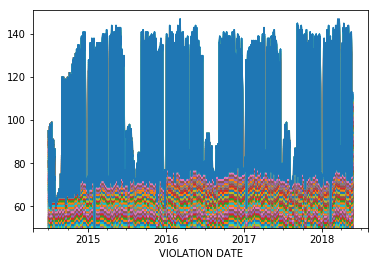

In [16]:
df10.plot.area(legend = None, ylim = (50,151))

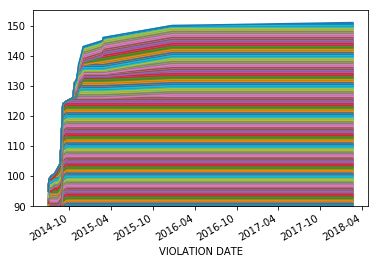

In [17]:
df12 = df4.min()
df12['VIOLATIONS'] = 1
df12 = df12.pivot_table('VIOLATIONS', index = ['VIOLATION DATE'], columns = ['CAMERA ID'])
df12 = df12.fillna(method='ffill')
df12.plot.area(legend =None, ylim = (90,155))

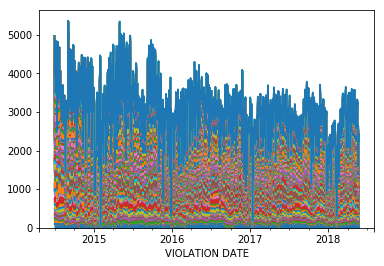

In [18]:
df13 = df1.pivot_table('VIOLATIONS', index = ['VIOLATION DATE'], columns = ['CAMERA ID'], fill_value = 0, margins = True, aggfunc = [np.sum])
dfbb = df1.pivot_table('VIOLATIONS', index = ['VIOLATION DATE'], columns = ['CAMERA ID'], fill_value = 0)
dfbb.plot.area(legend = None)

In [19]:
print(df13.iloc[:,-1].sum()/2/len(df13))

3063.5894736842106


In [20]:
df14 = df13.iloc[:,-1] < 1000
print (df14[df14])

VIOLATION DATE
2015-01-04    True
2015-01-08    True
2015-02-01    True
2015-02-02    True
2015-11-21    True
2015-12-28    True
2017-01-11    True
2017-01-12    True
2017-12-24    True
2018-02-09    True
Name: (sum, All), dtype: bool


In [21]:
df14 = df13.iloc[:,-1] > 5000
print (df14[df14])

VIOLATION DATE
2014-09-02 00:00:00    True
2014-09-03 00:00:00    True
2015-05-01 00:00:00    True
2015-05-07 00:00:00    True
2015-05-21 00:00:00    True
All                    True
Name: (sum, All), dtype: bool
